In [97]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

Text(0.5, 1.0, 'Original RGB imamge')

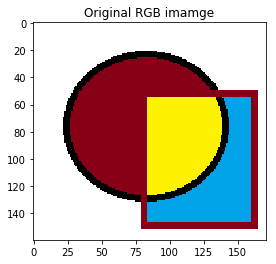

In [98]:
# read the image

image_original = mpimg.imread('../images/hpf.bmp')
image = image_original.copy() # else it is read only

# display original

plt.imshow(image_original, cmap='gray')
plt.title('Original RGB imamge')

Text(0.5, 1.0, 'grayscale image')

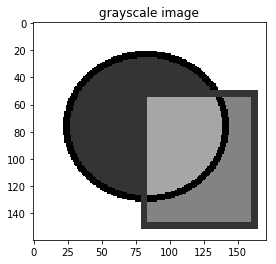

In [99]:
# convert to gray

# converting to grayscale: avg method

R = image[:,:, 0]
G = image[:,:, 1]
B = image[:,:, 2]

grayscale = (R/3 + G/3 + B/3)

# %matplotlib qt
plt.imshow(grayscale, cmap='gray')
plt.title('grayscale image')

In [100]:
def filterAndDisplay(grayscale):

    # Filtering

    # take input from user
    # n -> filter size
    # filt -> filter kernel
    n = int(input('enter the filter size (must be odd): '))
    filt = np.zeros((n, n))

    print('Enter the values of the filter: ')
    for i in range(n):
        for j in range(n):
            temp = float(input('({0}, {1}) : '.format(i, j)))
            filt[i, j] = temp



    # constructing deviation from centre matrix
    # n -> filter size
    deviations = []
    for i in range(n):
        dev_row = []
        for j in range(n):
            elem = ( j - n//2, i - n//2)
            dev_row.append(elem)

        deviations.append(dev_row)


    # initialize result to store image
    result = np.zeros(grayscale.shape)



    # filtering logic using deviation mask
    for i in range(grayscale.shape[0]):
        for j in range(grayscale.shape[1]):
            filter_prod = 0

            for k in range(n):
                for m in range(n):

                    x_shift = deviations[k][m][0]
                    y_shift = deviations[k][m][1]

                    x_index = i + y_shift  
                    y_index = j + x_shift

                    if (x_index < 0 or x_index >= grayscale.shape[0] or y_index < 0 or y_index >= grayscale.shape[1]):
                        continue

                    t = grayscale[i + y_shift, j + x_shift]
                    filter_prod = filter_prod + ( filt[k][m] * t )


            if filter_prod < 0:
                result[i, j] = 0
            elif filter_prod > 255:
                result[i, j] = 255
            else:
                result[i, j] =  round(filter_prod)

    plt.imshow(result, cmap='gray')
    plt.title('filtered image')


Text(0.5, 1.0, 'grayscale image')

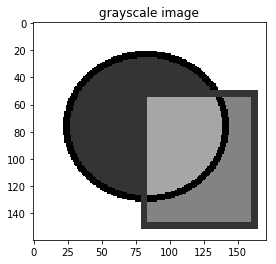

In [101]:
plt.imshow(grayscale, cmap='gray')
plt.title('grayscale image')

enter the filter size (must be odd): 3
Enter the values of the filter: 
(0, 0) : .111111111111111111111111111
(0, 1) : .111111111111111111111111111
(0, 2) : .111111111111111111111111111
(1, 0) : .111111111111111111111111111
(1, 1) : .111111111111111111111111111
(1, 2) : .111111111111111111111111111
(2, 0) : .111111111111111111111111111
(2, 1) : .111111111111111111111111111
(2, 2) : .111111111111111111111111111


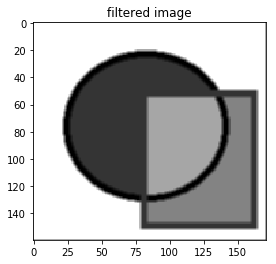

In [102]:
filterAndDisplay(grayscale)